# Introduction to Deep Learning With KERAS
###### By K Igwe 

## Prerequisite
1. Programming
2. Statistics
3. Calculus
4. Linear Algebra
5. Probability
6. Data science Basics.


## Learning Objectives
- Understanding Deep Learning (DL);
- Exploring deep learning techniques;
- Practically applying a Deep Learning Algorithm With Keras.
  
  
  
## Outline
- What is deep learning
- Applications of deep learning
- Building an Image Classification Deep Learning Model(CNNs) with Keras.



## Skills to be obtained

- Python Programming
- Artificial neural network(ANN)
- Neural Network Architecture
- Backpropagation
- Tensorflow
- Keras
- Hyperparameter tuning
- Convolutional Neural Network
- Deep Learning



# What is deep learning

Deep learning(DL) is an emerging subfield of machine learning(ML). It employs artificial neural network (ANN) algorithms to process data, derive patterns or to develop abstractions, simulating the thinking process of a biological brain.
And those ANNs usually contain more than one hidden layer, which is how deep learning got its name—machine learning with
stacked neural networks. Going beyond shallow ANNs (usually with only one hidden layer),a deep learning model with the right architectures and parameters can better represent complex non-linear relationships.


   ### AI, ML and DL Relationship
   
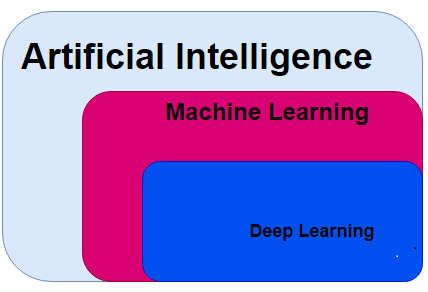  *AI, ML and DL Relationship*
                                               


## Convolutional Neural Networks (CNNs)
 - Convolutional Neural Networks (CNNs) are one of the most popular neural network architectures. They are extremely successful at image processing, but also for many other tasks (such as speech recognition, natural language processing, and more).
 
 - CNNs classify images by first deriving low-level representations, local edges and curves, then by composing higher-level representations, overall shape and contour, through a series of low-level representations. 
 - CNNs are well suited to exploiting strong and unique features that differentiate between images.

 - In general, CNNs take in an image, pass it through a sequence of convolutional layers, nonlinear layers, pooling layers and fully connected layers, and finally output the probabilities of each possible class.

 - The state of the art CNNs are pretty deep (dozens of layers at least), so they are part of Deep Learning. But you can build a shallow CNN for a simple task, in which case it's not (really) Deep Learning.

 - But CNNs are not alone, there are many other neural network architectures out there, including Recurrent Neural Networks (RNN), Autoencoders, Transformers, Deep Belief Nets (DBN = a stack of Restricted Boltzmann Machines, RBM), and more. They can be shallow or deep. Note: even shallow RNNs can be considered part of Deep Learning since training them requires unrolling them through time, resulting in a deep net.

##### Example of a shallow ANN:
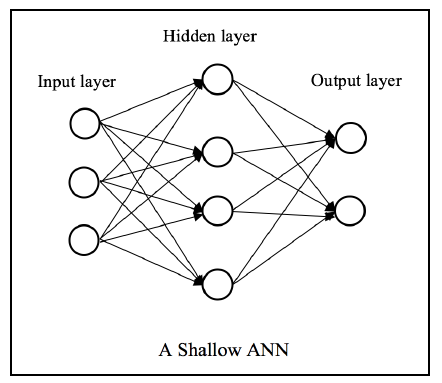 *Source: Liu YH, Maldonado P. R Deep Learning Projects*
    






##### Example of a deep learning model:
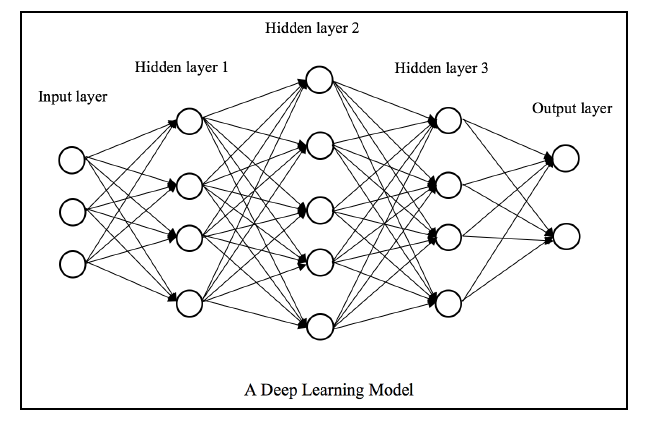 *Source: Liu YH, Maldonado P. R Deep Learning Projects*

### What makes deep learning special?

Deep learning can be used in supervised learning, semi-supervised learning, as well as unsupervised learning tasks, even
reinforcement learning tasks.
Deep learning employs a stack of multiple hidden layers of non-linear processing units. The input of a hidden layer is the output of its previous layer.

### Feature extraction process
  - Features are extracted from each hidden layer;
  - Features from different layers represent abstracts or patterns of different levels;
  - higher-level features are derived from lowerlevel features;
  - It forms a hierarchical representation learned from the data.

### Traditional ML Vs Deep Learning Clasification Solution
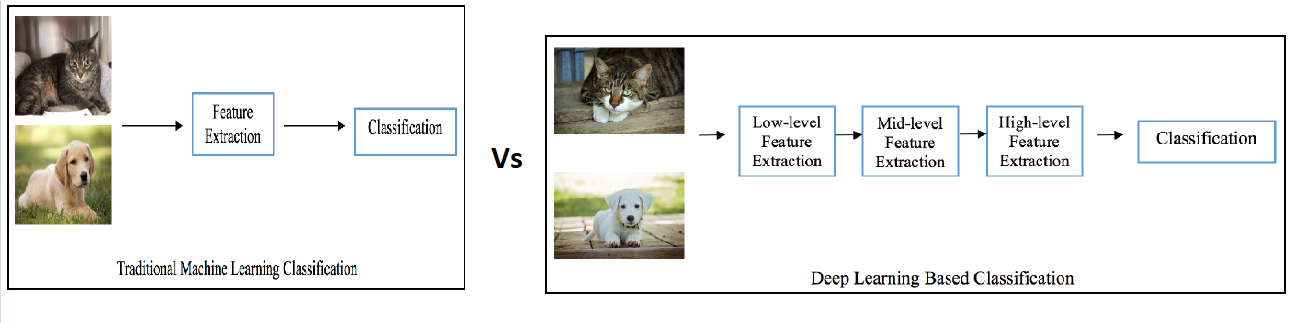
                 *Traditional ML Vs Deep Learning Clasification Solution. Source: Liu YH, Maldonado P. R Deep Learning Projects*  
                 
Deep learning removes those manual or explicit feature extraction steps, and instead relies on the training process to automatically discover useful patterns underneath the input data.

### Applications of deep learning
    - Computer vision
    - Image recognition and Coloring
    - Virtual Assistants(NLP)
    - Chatbots
    - Composing Music
    - e.tc.

# Image Classification using CNNs

This lession will cover only an example of a Convolutional Nueral Networks Architechuter. 


### Installing Important Packages

In [25]:
!pip install --upgrade pip


In [26]:
!pip install tensorflow  #TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

ERROR: Invalid requirement: '#TensorFlow'


In [27]:
import tensorflow as tf

In [28]:
import tensorflow as tf
from tensorflow import keras   # Keras is a Python deep-learning library. It provide an Application Programming Interface (API) that can be used to interface with other libraries, such as TensorFlow, in order to program neural networks. Keras is designed for rapid development and experimentation.

In [29]:
keras.__version__     #check the version of installed keras

'2.8.0'

In [30]:
tf.__version__#check the version of installed tensorflow

'2.8.0'

# Importing the dataset direct from keras

In [31]:

fashion_mnist = keras.datasets.fashion_mnist

# Data Exploration and Preprocessing

## Spliting Data
- Split the training and testing data into X (image) and Y (label) arrays(creating 2 turple)

In [32]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

## Importing some Important libraries to access and visualize Data

In [33]:
import pandas as pd
import numpy as np
%matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [34]:
plt.imshow(x_train_full[1])    #using matplotlib to access and visualize the images-[1] to access the second image

In [35]:
y_train_full[0]    # to view the actual category of the object, call the element

9

In [36]:
# instead of always refering to the labels, you can create the list of the class names,
#so that you can just compare if you call any element of the class
class_names = ["T-shirt/Top", "Touser", "Pullover", "Dress", "coat", "Sandal", "Shirt", "sneaker", "Bag", "Angle Boot"]

In [37]:
class_names[y_train_full[2]]

'T-shirt/Top'

In [38]:
x_train_full[1]  # to view the actual pixel of the data in each row

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Normalisation
- so that the data will be of the same scale.
- since we are going to use Gradient Discent we have to Normalize the data. We need to restrict the pixel intensity to 0 and 1
- In this lab we will divide by 255.0 to float values, but sometimes recent Python version can take care  of this.

In [39]:
x_train_n = x_train_full/255.    
x_test_n = x_test/255.

## Split the data into Train, Validation and Test set

  **Training data**- is used to build the model
  **Validation data**- is used for tuning the hyperparameters and evalustion of the models
  **Test data**- used to test the model after the model has gone through the initial vetting by the validation set


In [40]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [41]:
x_valid[0]   # to view the first value dataset

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model creation(Structure)
The are two ways of model Creation
  - Sequentail API( Straing forward and simple)
  - Functional API( complex but give the flexebility to create complex CNN)
  
### Sequential vs Functional API
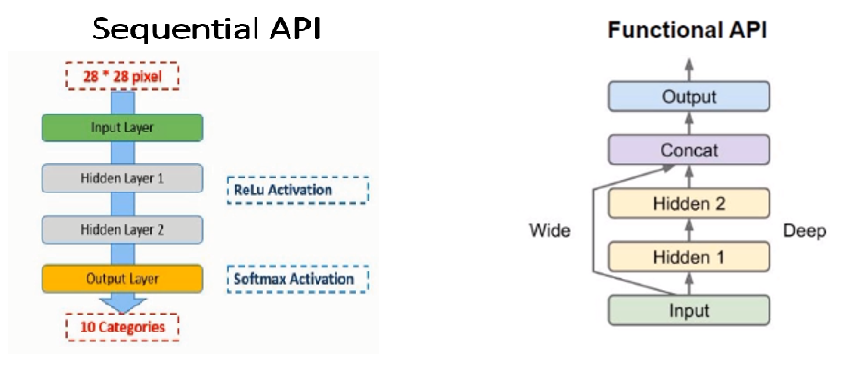 *Sequential vs Functional API*

However in this lession we will be doing only an example of a Sequential API model structure.

## Hyperparameters
- The following are some of the hyperparameters(Optimizer hyperparameters,Model Specific hyperparameters) that can be used to optmize a deep learning model. A process called hyperparameter tuning is important when it comes to optmization of a machine learning model.
 - Number of Layers
 - Number of neurons per layer
 - Type of activation function
 - Learning Rate
 - Weight initialization logic
 - Batch size
 - Number of Epochs
 

## The CNNs layers

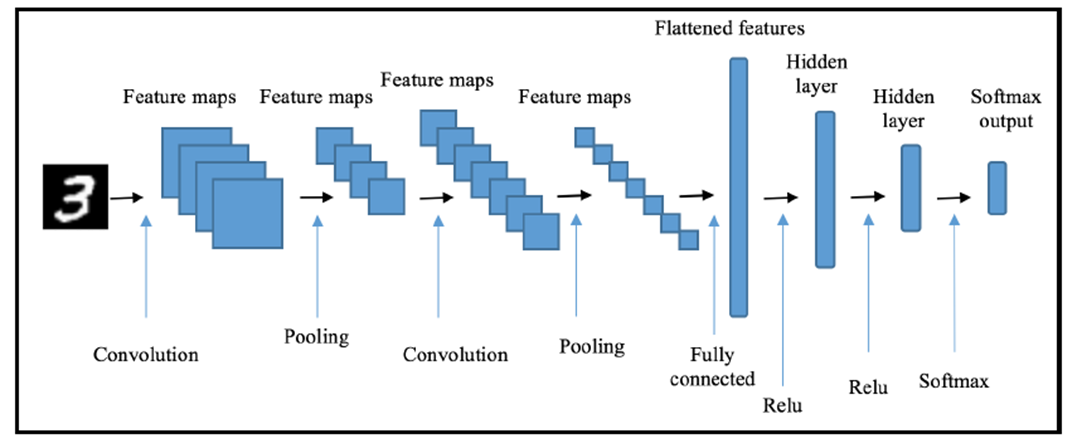*CNN model Structure. Source: Liu YH, Maldonado P. R Deep Learning Projects*

 - CNNs classify images by first deriving low-level representations, local edges and curves, then by composing higher-level representations, overall shape and contour, through a series of low-level representations. 
 - CNNs are well suited to exploiting strong and unique features that differentiate between images.

 - In general, CNNs take in an image, pass it through a sequence of convolutional layers, nonlinear layers, pooling layers and fully connected layers, and finally output the probabilities of each possible class.

### Convolutional layer 

  - The convolutional layer is the first layer in a CNN. 
  - It simulates the way neuronal cells respond to receptive fields by applying a convolutional operation to the input. 
  - To be specific, it computes the dot product between the weights of the convolutional layer and a small region they are connected to in the input layer.

### Activation layer
   - Right after each convolutional layer, we often apply a non-linear layer (also called activation layer), in order to introduce non-linearity.
   - This is because only linear operations (multiplication and addition) are conducted in the convolutional layer. And a neural network with only linear hidden layers would behave just like a single-layer perceptron, regardless of how many layers. 

   - Rectified linear unit (ReLU), is the most popular candidate for the non-linear layer in deep neural networks.
    
 **A plot of the ReLU function is as follows:**
 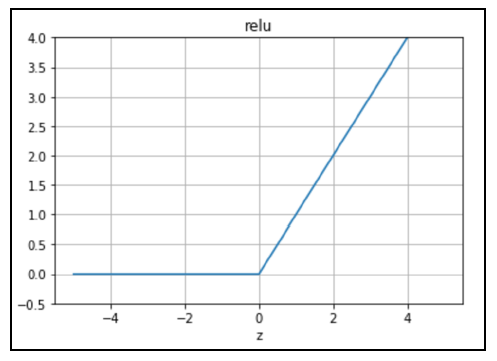*Source: Liu YH, Maldonado P. R Deep Learning Projects*
 
### Pooling layer
    - To address the dimension growth issue, we often employ a pooling layer (also called downsampling layer) after a pair of convolutional and non-linear layers.
    - Besides reducing overfitting with lower dimensional output, the pooling layer aggregating statistics over regions has another advantage—translation invariant. It means the output does not change, if the input image undergoes a small amount of translation.



In [42]:
np.random.seed(42)
#tf.random.set_seed(42) setting a seed to allow randomisation.

In [43]:
model = keras.models.Sequential()   # model object

In [44]:
model.add(keras.layers.Flatten(input_shape=[28,28]))  

# For the input layer- use flatten to convert the 28x28(2D array) into single array= 784

In [45]:
model.add(keras.layers.Dense(300, activation = "relu"))   # 1st hidden or dense layer- 300-neurons

In [46]:
model.add(keras.layers.Dense(100, activation = "relu"))   # 2nd Hidden layer

In [47]:
model.add(keras.layers.Dense(10, activation = "softmax"))   # output layer with 10 neurons for 10 classes

In [48]:
model.summary()   # To look at your model- Parameters(TotalWeights + Totalbiases)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
pip install pydot    


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install graphviz

In [51]:
import pydot      #to look into our CNN


In [52]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [53]:
weights, biases = model.layers[1].get_weights()   # to get the information for the weights and biases

In [54]:
weights

array([[ 0.04249145,  0.01261733,  0.0038382 , ...,  0.04521094,
         0.00233953,  0.04044639],
       [ 0.03335971, -0.02883203,  0.02177525, ...,  0.06239636,
         0.02303205, -0.01721616],
       [ 0.06114967,  0.01347958, -0.02064094, ..., -0.05616479,
         0.0475391 ,  0.04694097],
       ...,
       [-0.03271529, -0.02583304, -0.03118806, ..., -0.0269421 ,
        -0.06232684,  0.03008438],
       [-0.06372333, -0.00393403,  0.06135754, ...,  0.05007405,
        -0.07418155, -0.07092422],
       [ 0.07416426, -0.05018982,  0.01271199, ...,  0.01582564,
         0.00230824,  0.06564622]], dtype=float32)

In [55]:
weights.shape

(784, 300)

In [56]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [57]:
biases.shape

(300,)

# Compiling and Training a CNN Model

    compile method is used to set up the learning processes.
    Use the Loss function(cross entropy) y-data is available as labels
    Optmizer-Stochastic Gradient Descent( for Backpropagation)
    Metrics-Accuracy for classification
    
## Backpropagation
Backpropagation is a popular method for training artificial neural networks, especially deep neural networks.
Backpropagation performs a gradient descent within the solution's vector space towards a global minimum.
 - **Step 1** Assign the random Weights and Bias values.
 - **Step 2** Calculate the final output using these values.
 - **Step 3** Estimate error using error function.
 - **Step 4** Find those Weights and Biases that can reduce this error.
 - **Step 5** Updated the Weights and Biases and repeat the process from step 2

In [58]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics =["accuracy"])


In [59]:
model_history = model.fit(x_train, y_train,epochs=30, validation_data= (x_valid, y_valid))  

# fit x and y train in our model and store in model history.

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.7218 - accuracy: 0.7607 - val_loss: 0.5021 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4935 - accuracy: 0.8282 - val_loss: 0.4615 - val_accuracy: 0.8414
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4504 - accuracy: 0.8425 - val_loss: 0.4213 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4226 - accuracy: 0.8513 - val_loss: 0.4127 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4021 - accuracy: 0.8583 - val_loss: 0.4007 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3849 - accuracy: 0.8629 - val_loss: 0.3755 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3710 - accuracy: 0.8673 - val_loss: 0.3872 - val_accuracy:

- At each epoch, keras display the number of instances processed so far.
     - loss on training data = 0.2291
     - Accuracy on training data = 0.9178
     - loss on validation data = 0.2997
     - Accuracy on validationg data = 0.8890

In [60]:
model_history.params   #You can call the parameters of the model

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [61]:
model_history.history  # You can see the historical model set parameters as it trains per each epoch, ie loss and accuracy for both training and validation. 


{'loss': [0.7218142151832581,
  0.49353691935539246,
  0.4503730833530426,
  0.422597736120224,
  0.4021316170692444,
  0.3849234879016876,
  0.3709711730480194,
  0.35885462164878845,
  0.34963753819465637,
  0.3390273451805115,
  0.3310603201389313,
  0.3206450641155243,
  0.31454548239707947,
  0.3077912926673889,
  0.30092141032218933,
  0.29518264532089233,
  0.28927478194236755,
  0.2844013273715973,
  0.27803835272789,
  0.2739628255367279,
  0.2682857811450958,
  0.2631934881210327,
  0.2586269974708557,
  0.25414419174194336,
  0.2505496144294739,
  0.24550850689411163,
  0.24243031442165375,
  0.23859944939613342,
  0.23449505865573883,
  0.2304774522781372],
 'accuracy': [0.7606545686721802,
  0.8281636238098145,
  0.8424545526504517,
  0.8512545228004456,
  0.8583454489707947,
  0.862927258014679,
  0.8672909140586853,
  0.8721636533737183,
  0.8742908835411072,
  0.8792181611061096,
  0.8810363411903381,
  0.8843818306922913,
  0.887327253818512,
  0.8898000121116638,
  0.

In [62]:
# You can plot the metrics and see graphicaly how they were changing
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Model Perfomance Evaluation and Predicting

    Using new dataset (Test dataset)

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8819


[0.33360591530799866, 0.8819000124931335]

In [37]:
x_new = x_test[:3]        # Test the model on thew unseen data and use the first 3 rows



In [38]:
y_proba = model.predict(x_new) 

# there are two parameters to predict which are: the prodabilities of each class and the second is the class itself.

In [39]:
y_proba.round(2) 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.96, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [ ]:
# In the 1st row the predicted class is 9 with a probability of 0.98
# In the second, the predicted class is 2 and 1 in the last respectively with a probability of 0.96 and 1.0 respectively

In [41]:
np.array(class_names)[y_pred]   # call the class names instead of the labels

array(['Angle Boot', 'Pullover', 'Touser'], dtype='<U11')

In [42]:
print(plt.imshow(x_test[0]))  #Plot the Image of the first new dataset to corfirm.

AxesImage(100,55;620x385)


In [43]:
print(plt.imshow(x_test[1]))

AxesImage(100,236.429;620x22.1429)


In [44]:
print(plt.imshow(x_test[2]))

AxesImage(100,236.429;620x22.1429)


# Exercise

1. Modify the model and change the specified Hyperparameters(Hyperparameter Tuning) and see if the model accuracy can be improved.
2. Try to build a CNNs model using the Functional API structure.

# References

1. Liu YH, Maldonado P. R; 2018 Feb 22. *Deep Learning Projects: Master the techniques to design and develop neural network models in R. Packt* Publishing Ltd.
2. Vasilev, I., Slater, D., Spacagna, G., Roelants, P. and Zocca, V., 2019. *Python Deep Learning: Exploring deep learning techniques and neural network architectures with PyTorch, Keras, and TensorFlow. Packt Publishing Ltd*.

3.  François Chollet, 2020. *Complete guide to the Sequencial and functional API* https://keras.io/guides/functional_api/

4. Aarya Brahmane, 2020. *Deep Learning with CIFAR-10* https://towardsdatascience.com/deep-learning-with-cifar-10-image-classification-64ab92110d79